In [69]:
# Loading up the json for yolo_object_tracking pipeline

import os
import json

motion_vec_json_dir = os.path.join(os.getcwd(), "curled_results/yolo_object_tracking")
video_to_json_vecs = {}
for filepath in os.listdir(motion_vec_json_dir):
    print('reading ' + filepath)
    with open(os.path.join(motion_vec_json_dir, filepath)) as f:
        res = json.loads(f.readline())
        video_to_json_vecs[os.path.basename(filepath)] = res
        video_url = res['user_inputs']['video']['url']
        print(f"url was: {video_url}")



reading S02_FP_U001_SP_U002.txt
url was: https://local-file-uploads-grapefruit.storage.googleapis.com/04959a59-7f48-4185-9d49-2ad723cdd15c/a0045ffb-2c2c-4d1b-8fd3-579355f9b858-S02_FP_U001_SP_U002_compressed.mov?X-Goog-Algorithm=GOOG4-RSA-SHA256&X-Goog-Credential=abhi-admin%40sieve-grapefruit.iam.gserviceaccount.com%2F20230225%2Fauto%2Fstorage%2Fgoog4_request&X-Goog-Date=20230225T191855Z&X-Goog-Expires=3600&X-Goog-SignedHeaders=host&x-goog-signature=39071cd5605d098f3680f27a3b93ce564551716afd2e2293d24b967911cf50f7bf093eb0219cb7a23c4b5c3e2f056f02d3bb510750e1e129c6a052f6cd2af663ce566ceb87396072b271fc1b085a7177e802464d98535ee9c0e69d1b5203ef5a54ddb4deee271060c8eca5b25eea68d1f9eb1ac41059bd8d2b88da12ca55d1a292657acfe963961acc17e86b1dd39f51dceba59e72ef7372fff10d256da43e32d43469dd0450f207fbf1ce4553c0272c1b0ceab8e02c7206223d8d90a6acb8a14728761d69cf00fe3c9c25ff8a356f81fb665db15c0dedc2ef0a972c80dc7a6fe512d5535e45f04fef8b7a9c0bd68f9f168a3404cbcfeb960a587114146c6404
reading S10_FP_U007_SP_U015.txt
ur

url was: https://local-file-uploads-grapefruit.storage.googleapis.com/04959a59-7f48-4185-9d49-2ad723cdd15c/5aae4bd0-1179-43fa-be34-1a6280894fb2-S06_FP_U010_SP_U011_compressed.mov?X-Goog-Algorithm=GOOG4-RSA-SHA256&X-Goog-Credential=abhi-admin%40sieve-grapefruit.iam.gserviceaccount.com%2F20230225%2Fauto%2Fstorage%2Fgoog4_request&X-Goog-Date=20230225T192452Z&X-Goog-Expires=3600&X-Goog-SignedHeaders=host&x-goog-signature=5deef3bc0a111c40f87c7e83797b492532716fd456a3ffd6c159925356267df56159775a7e5b3bfbf1bda12279db939d2cf408e3d60fa1b4cff11d37c726b42b4cdf6b49bb4e2accc9a56b1a65e61626082a3cbd96937965ba242f3d8f333b9c72bea04537e5481e08c3ed266d92cc5fbcd4a61ef1f388404e73348a7c8f6148e18263888f1ca95c3d109d1120742cd5820d46c84b61d68281f2db41ddc00b9741f178f2103bbafdd92d725076a573b325a695298e8789919b32ca27326bf27504f61bf00dafc9bd7bbe86fbd352c36fde7b4a243bb336fb4168ae94fd9ecf66aeaf41032256b076bf65f9f275479995a59ab32d52a7d99c037719dd5e592cd5
reading S12_FP_U001_SP_U018.txt
url was: https://local-file-upload

In [70]:
# Now that we have the bounding boxes from sieve, we can pull out the centroids

import numpy as np
video_entries = {}
for video, val in video_to_json_vecs.items():
    print(f"processing for video {video}...")
    track_id_to_track = {}
    for obj_id, track in val["data"][0].items():
        # each entry may contain multiple tracked objects
        track_frame_to_data = {}
        for bbox_entry in track:
            # print(f'bbox at frame {bbox_entry["frame_number"]}: {bbox_entry["box"]}')
            frame_number = bbox_entry["frame_number"]
            class_label = bbox_entry["class"]
            bbox_coords = bbox_entry["box"]
            top_left = bbox_coords[:2]
            bot_right = bbox_coords[2:]
            centroid = np.mean([top_left, bot_right], axis=0)
            track_frame_to_data[bbox_entry["frame_number"]] = {}
            track_frame_to_data[bbox_entry["frame_number"]]["bbox"] = [top_left, bot_right]
            track_frame_to_data[bbox_entry["frame_number"]]["centroid"] = centroid
            track_frame_to_data[bbox_entry["frame_number"]]["class"] = class_label
            
        # update entry for this obj track
        track_id_to_track[obj_id] = track_frame_to_data
            
    # update all object tracks for this video
    video_entries[video] = track_id_to_track
    print(f"got bounding boxes for {video}")
        

processing for video S02_FP_U001_SP_U002.txt...
got bounding boxes for S02_FP_U001_SP_U002.txt
processing for video S10_FP_U007_SP_U015.txt...
got bounding boxes for S10_FP_U007_SP_U015.txt
processing for video S03_FP_U004_SP_U005.txt...
got bounding boxes for S03_FP_U004_SP_U005.txt
processing for video S01_FP_U001_SP_U003.txt...
got bounding boxes for S01_FP_U001_SP_U003.txt
processing for video S08_FP_U017_SP_U016.txt...
got bounding boxes for S08_FP_U017_SP_U016.txt
processing for video S06_FP_U011_SP_U010.txt...
got bounding boxes for S06_FP_U011_SP_U010.txt
processing for video S05_FP_U009_SP_U008.txt...
got bounding boxes for S05_FP_U009_SP_U008.txt
processing for video S07_FP_U012_SP_U013.txt...
got bounding boxes for S07_FP_U012_SP_U013.txt
processing for video S11_FP_U004_SP_U001.txt...
got bounding boxes for S11_FP_U004_SP_U001.txt
processing for video S02_FP_U002_SP_U001.txt...
got bounding boxes for S02_FP_U002_SP_U001.txt
processing for video S11_FP_U001_SP_U004.txt...
go

In [3]:
video_entries["S02_FP_U001_SP_U002.txt"]["10617ceb-8d07-4f51-8770-f6469d0c883b"]

{30: {'bbox': [[230.93734741210938, 99.94206237792969],
   [386.6958923339844, 359.792724609375]],
  'centroid': array([308.81661987, 229.86739349]),
  'class': 'person'},
 40: {'bbox': [[230.95200302853033, 104.10078896372116],
   [383.7028507572173, 359.8033355762718]],
  'centroid': array([307.32742689, 231.95206227]),
  'class': 'person'},
 50: {'bbox': [[230.8149809394554, 100.31949222056238],
   [384.51035501880654, 357.3819726677631]],
  'centroid': array([307.66266798, 228.85073244]),
  'class': 'person'},
 60: {'bbox': [[231.18490461658638, 100.23381424533638],
   [383.35606576076424, 355.37552942200745]],
  'centroid': array([307.27048519, 227.80467183]),
  'class': 'person'},
 70: {'bbox': [[231.35152114342674, 98.0234942735033],
   [383.3957090080658, 354.0732677993036]],
  'centroid': array([307.37361508, 226.04838104]),
  'class': 'person'},
 80: {'bbox': [[235.8126000446544, 115.28947462485803],
   [383.24018005876445, 349.79862427147106]],
  'centroid': array([309.52639

In [71]:
# Lets visualize these, each tracked object in a given video gets a different label/color

import matplotlib.pyplot as plt
for video_name, entry in video_entries.items():
    print(f'processing {video_name}')
    for track_id, track in entry.items():
        print(f'plotting centroids for track {track_id}...')
        vals = [val for val in track.values()]
        class_id = vals[0]['class']
        if class_id != 'person':
            continue
        print(f'class id was {class_id}')
        x_vals = [a['centroid'][0] for a in vals]
        y_vals = [a['centroid'][1] for a in vals]
        plt.scatter(x_vals, y_vals, s=1)
    
    video_name = os.path.splitext(video_name)[0]
    fig_name = video_name + '.png' 
    plt.xlabel(video_name)
    print(f'saving: {fig_name}')
    plt.savefig(fig_name)
    plt.close()

# so in general this should be monotonic with head motion and therefore a good proxy feature regardless of seated positon

processing S02_FP_U001_SP_U002.txt
plotting centroids for track 10617ceb-8d07-4f51-8770-f6469d0c883b...
class id was person
plotting centroids for track 49e4012a-87d2-419b-aef3-2028c442c0d9...
plotting centroids for track 5e1f0034-a4fd-4971-8f14-576c67c6016f...
plotting centroids for track 5ad9cc08-54e0-40da-9de7-e181b20b0a52...
plotting centroids for track bb5d0399-edbf-4443-8337-f14880e311d7...
plotting centroids for track b9746d3e-afe9-486b-a387-0c8bf2a36563...
plotting centroids for track 2a65af11-d652-4f69-aa1e-1911b2a614e2...
saving: S02_FP_U001_SP_U002.png
processing S10_FP_U007_SP_U015.txt
plotting centroids for track 7053147e-12c6-4a4e-a2f4-f0d78aa4df3e...
class id was person
plotting centroids for track ecf327db-de61-4e02-97ba-badb585245e3...
class id was person
plotting centroids for track e08001ba-b57d-4c55-9a6d-086ba9fd6222...
class id was person
plotting centroids for track 7c3cb724-8d8f-4365-a86d-36a94f7491d6...
class id was person
plotting centroids for track 5500c83f-d

processing S06_FP_U011_SP_U010.txt
plotting centroids for track c7ef8f98-56dc-4b5b-82d3-5b674a4b5048...
plotting centroids for track 8d57bd5a-4b98-4fa8-aaa7-1b0c63c92466...
plotting centroids for track c0ffb376-4f23-4743-980e-da85f705533e...
class id was person
plotting centroids for track b9835f5f-caf1-4764-ad53-e5b3f6554db3...
plotting centroids for track 59ff8bdb-488e-4cd0-a650-51e0eeb9ea44...
plotting centroids for track ebaf9288-c019-4d18-9a92-63b10aa1e70c...
plotting centroids for track 5f8426bd-1eeb-45e1-bee2-508684ff5a56...
plotting centroids for track c2b9e84d-dead-4da8-a29e-61ed55c99069...
plotting centroids for track 5902360f-008a-4862-a969-9d01f31f9649...
plotting centroids for track 5d3b4733-6cba-494c-9043-4f6bc2ff71e7...
plotting centroids for track 209a97b9-2f01-4cde-ad04-956c5fb9fdf5...
plotting centroids for track fbfbc853-3070-4348-a652-e0908f4752be...
plotting centroids for track 647b3e10-3506-42ee-9fb2-699c77b27623...
plotting centroids for track e955d2f5-87b0-49ec-

processing S11_FP_U004_SP_U001.txt
plotting centroids for track bf60e3d8-a486-42c4-b27b-9bb123d08c8e...
class id was person
plotting centroids for track 6b35bf3e-be3b-415d-89ae-d7ce5a2d134b...
class id was person
plotting centroids for track fd44b7f9-21ab-41e8-ad89-5ccdfaee47dd...
class id was person
plotting centroids for track f5d66c00-9116-4b0d-9c5a-322c409410fa...
class id was person
plotting centroids for track c4407303-23f4-4fca-98d1-34bfecf7cd71...
class id was person
plotting centroids for track 677f84b0-95a5-4a9d-af50-2d0372049ab2...
class id was person
plotting centroids for track 0cf7b45e-cdd3-439e-b750-b2b5f0194152...
class id was person
plotting centroids for track f703859c-f099-406d-801a-2b76873d4dfe...
class id was person
plotting centroids for track b6927582-d95f-4f56-9c63-958300324fae...
class id was person
plotting centroids for track 77ebd4b6-572d-4846-a66f-6196c4c23357...
class id was person
plotting centroids for track e70d4c18-d99a-402a-b7c6-217302af0922...
class 

processing S12_FP_U018_SP_U001.txt
plotting centroids for track 4be90f00-892d-4ff4-a8e9-39723d16c0fd...
class id was person
plotting centroids for track 083a6ba8-9cd9-4ace-b85f-8652467013da...
class id was person
plotting centroids for track 648f6645-f3c7-40a3-a0cf-d85095d9cd48...
class id was person
plotting centroids for track 13cc13b2-363e-41f4-9f51-578771c8a07a...
class id was person
plotting centroids for track eeab7bac-aaf3-4310-9efd-360c09ca9e96...
class id was person
plotting centroids for track 4496ff84-e4b4-47d4-b624-d708f40dceb2...
class id was person
plotting centroids for track 36986c87-c2b2-4ef2-a8fc-d274b735cd27...
plotting centroids for track ea8d7945-4405-4624-b3b9-ec8c56e928d2...
plotting centroids for track 9a152387-8e39-48b0-b4dd-d691b2f52f90...
plotting centroids for track ffa2e6ab-0271-458a-8996-3a05fac7ebf1...
saving: S12_FP_U018_SP_U001.png
processing S09_FP_U014_SP_U011.txt
plotting centroids for track 7cc6ca59-2249-491c-bee7-9fc1c508862e...
class id was person

processing S08_FP_U016_SP_U017.txt
plotting centroids for track 2ad60b4d-0e6a-4711-b2f2-89ab09e53719...
class id was person
plotting centroids for track 6dc65c1d-3352-4883-b1d5-638b4d38d237...
class id was person
plotting centroids for track f6412396-a20d-4ad7-ab7e-8d29dc867cea...
class id was person
plotting centroids for track 9d93f8d7-6c8d-42b7-b702-9f0583d93b24...
class id was person
plotting centroids for track 79344d60-cedd-4545-a4f8-0918812d627e...
class id was person
plotting centroids for track a44b2c99-8819-4e2e-b5d7-a4ca13f89646...
class id was person
plotting centroids for track 9491bd8f-7bfb-4723-8d38-a10cd2187222...
class id was person
plotting centroids for track cde9321e-e0f4-4a0b-a3e5-378f1c046021...
class id was person
plotting centroids for track c491a5e3-0743-48cc-aa54-2e39516d2b9a...
class id was person
plotting centroids for track 8b745219-7933-43da-b66b-2cad61916058...
class id was person
plotting centroids for track 108abd12-677b-462c-9dd5-023844eed2a7...
class 

processing S01_FP_U003_SP_U001.txt
plotting centroids for track 290f2221-c9b5-4235-ae1b-4fc8f3cdf171...
class id was person
plotting centroids for track c92278de-00d6-4613-a529-db39f1c5b89d...
class id was person
plotting centroids for track c5ec1c47-e1c3-4b95-b544-266855ab41ac...
class id was person
plotting centroids for track 10cef917-08ca-4f71-9e85-f08f81ae867a...
class id was person
plotting centroids for track d1ab001d-ba79-412c-8985-8a1b93169478...
plotting centroids for track 62c31f39-ebee-48fd-8378-a06042576f1d...
plotting centroids for track 6e0e21c4-9d9c-4d79-8248-832f4622f994...
plotting centroids for track a76d5429-134e-4c66-94f9-299688fcd196...
saving: S01_FP_U003_SP_U001.png
processing S05_FP_U008_SP_U009.txt
plotting centroids for track cdd85df6-ebab-4d44-b5c9-7ce22812fdd1...
class id was person
plotting centroids for track 129246fb-d777-44f8-ab4e-2ad5526f29bb...
class id was person
plotting centroids for track e815620f-efc9-42cc-9505-4104aa0150fd...
class id was person

In [77]:
# video_entries['S02_FP_U001_SP_U002.txt']['10617ceb-8d07-4f51-8770-f6469d0c883b']
fpv_to_mean_mag = {}
for video_name, video_entry in video_entries.items():
    video = os.path.splitext(video_name)[0]
    print(video)
    fpv = video.split('_')[2]
    print(fpv)
    sorted_tracks_by_len = sorted(video_entry.keys(), key=lambda k: len(video_entry[k].keys()))
    max_track = video_entry[sorted_tracks_by_len[-1]]
    
    # Lets look at the longest track
    deltas = {}
    prev_id = 0
    prev_centroid = [0.0, 0.0]
    for frame_id, frame_entry in max_track.items():
        if frame_id - prev_id == 10:
            delta = frame_entry['centroid'] - prev_centroid
            deltas[frame_id] = {"frame_id": frame_id, "vec": delta, "magnitude": np.linalg.norm(delta)}
        
        prev_id = frame_id
        prev_centroid = centroid

    magnitudes = [a["magnitude"] for a in deltas.values()]
    avg_mag = np.mean(magnitudes)
    fpv_to_mean_mag[fpv] = avg_mag
    plt.plot(magnitudes)
    plt.xlabel(f'per frame delta norms for longest person track in: {video}, mean={avg_mag}')
    fig_name = video + '_magnitudes.png' 
    print(f'saving: {fig_name}')
    plt.savefig(fig_name)
    plt.close()
    
    print(f'total magnitudes for this track:: {len(magnitudes)}')



    # break
    """
    for track_name, object_track in video_entry.items():
        deltas = {}
        prev_id = 0
        prev_centroid = [0.0, 0.0]
        for frame_id, frame_entry in object_track.items():
            if frame_id - prev_id == 10:
                delta = frame_entry['centroid'] - prev_centroid
                deltas[frame_id] = {"frame_id": frame_id, "vec": delta, "magnitude": np.linalg.norm(delta)}
        
            prev_id = frame_id
            prev_centroid = centroid
            
        # Plot the magnitudes for this object track
        print(f'total tracked frames: {len(deltas)}')
        magnitudes = [a["magnitude"] for a in deltas.values()]
        # plt.plot(magnitudes)
        # plt.show()
    """

S02_FP_U001_SP_U002
U001
saving: S02_FP_U001_SP_U002_magnitudes.png
total magnitudes for this track:: 1290
S10_FP_U007_SP_U015
U007
saving: S10_FP_U007_SP_U015_magnitudes.png
total magnitudes for this track:: 1121
S03_FP_U004_SP_U005
U004
saving: S03_FP_U004_SP_U005_magnitudes.png
total magnitudes for this track:: 584
S01_FP_U001_SP_U003
U001
saving: S01_FP_U001_SP_U003_magnitudes.png
total magnitudes for this track:: 240
S08_FP_U017_SP_U016
U017
saving: S08_FP_U017_SP_U016_magnitudes.png
total magnitudes for this track:: 1454
S06_FP_U011_SP_U010
U011
saving: S06_FP_U011_SP_U010_magnitudes.png
total magnitudes for this track:: 4
S05_FP_U009_SP_U008
U009
saving: S05_FP_U009_SP_U008_magnitudes.png


/Users/scottloftin/dev/miniconda3/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/scottloftin/dev/miniconda3/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


total magnitudes for this track:: 0
S07_FP_U012_SP_U013
U012
saving: S07_FP_U012_SP_U013_magnitudes.png
total magnitudes for this track:: 1047
S11_FP_U004_SP_U001
U004
saving: S11_FP_U004_SP_U001_magnitudes.png
total magnitudes for this track:: 492
S02_FP_U002_SP_U001
U002
saving: S02_FP_U002_SP_U001_magnitudes.png
total magnitudes for this track:: 254
S11_FP_U001_SP_U004
U001
saving: S11_FP_U001_SP_U004_magnitudes.png
total magnitudes for this track:: 1983
S12_FP_U018_SP_U001
U018
saving: S12_FP_U018_SP_U001_magnitudes.png
total magnitudes for this track:: 1462
S09_FP_U014_SP_U011
U014
saving: S09_FP_U014_SP_U011_magnitudes.png
total magnitudes for this track:: 1447
S09_FP_U011_SP_U014
U011
saving: S09_FP_U011_SP_U014_magnitudes.png
total magnitudes for this track:: 258
S08_FP_U016_SP_U017
U016
saving: S08_FP_U016_SP_U017_magnitudes.png
total magnitudes for this track:: 951
S06_FP_U010_SP_U011
U010
saving: S06_FP_U010_SP_U011_magnitudes.png
total magnitudes for this track:: 202
S12_FP

In [92]:
fpv_to_extraversion = {
'U002':6,
'U001':10,
'U003':15,
'U004':10,
'U005':11,
'U007':11,
'U006':9,
'U008':8,
'U009':9,
'U013':10,
'U012':8,
'U010':15,
'U011':9,
'U016':10,
'U017':13,
'U014':10,
'U015':14,
'U018':19,
}


mean = np.mean([v for v in fpv_to_extraversion.values()])
print(f'Mean extraversion: {mean}')
bottom_half = {k: v for k, v in fpv_to_extraversion.items() if v < mean}
top_half = {k: v for k, v in fpv_to_extraversion.items() if v > mean}

print(bottom_half)
print(top_half)


Mean extraversion: 10.944444444444445
{'U002': 6, 'U001': 10, 'U004': 10, 'U006': 9, 'U008': 8, 'U009': 9, 'U013': 10, 'U012': 8, 'U011': 9, 'U016': 10, 'U014': 10}
{'U003': 15, 'U005': 11, 'U007': 11, 'U010': 15, 'U017': 13, 'U015': 14, 'U018': 19}


In [78]:
fpv_to_mean_mag

{'U001': 155.6107379903669,
 'U007': 241.22909517121946,
 'U004': 110.05631909316388,
 'U017': 187.5629159541139,
 'U011': 123.75819822602224,
 'U009': nan,
 'U012': 182.18482493751634,
 'U002': 785.5142067490656,
 'U018': 136.30684139158288,
 'U014': 77.38710888552627,
 'U016': 94.76081156349652,
 'U010': 548.8002576921446,
 'U003': 539.4289834473684,
 'U008': 550.3307082940588,
 'U006': 474.16242312357156,
 'U013': 126.98684561944481}

In [79]:
fpv_to_mean_mag.pop('U009')

nan

In [80]:
fpv_to_mean_mag

{'U001': 155.6107379903669,
 'U007': 241.22909517121946,
 'U004': 110.05631909316388,
 'U017': 187.5629159541139,
 'U011': 123.75819822602224,
 'U012': 182.18482493751634,
 'U002': 785.5142067490656,
 'U018': 136.30684139158288,
 'U014': 77.38710888552627,
 'U016': 94.76081156349652,
 'U010': 548.8002576921446,
 'U003': 539.4289834473684,
 'U008': 550.3307082940588,
 'U006': 474.16242312357156,
 'U013': 126.98684561944481}

In [110]:
bottom_half.pop('U009')

9

In [113]:

top_half_mags = [[fpv_to_mean_mag[uid]] for uid in top_half.keys()]
bottom_half_mags = [[fpv_to_mean_mag[uid]] for uid in bottom_half.keys()]
top_half_extra = [[fpv_to_extraversion[uid]] for uid in top_half.keys()]
bottom_half_extra = [[fpv_to_extraversion[uid]] for uid in bottom_half.keys()]


Text(0, 0.5, 'Self-reported extraversion (BFI-10)')

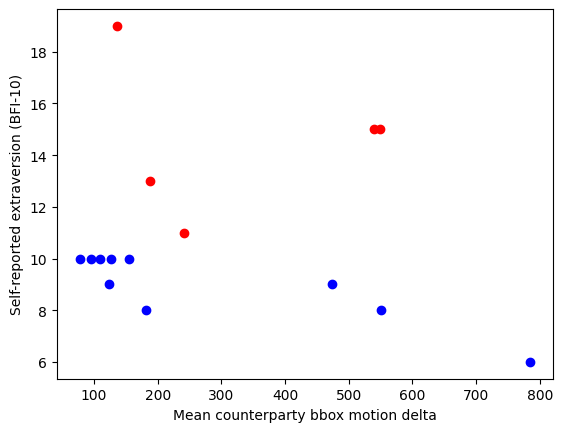

In [118]:
plt.scatter(top_half_mags, top_half_extra, color='red')
plt.scatter(bottom_half_mags, bottom_half_extra, color='blue')
plt.xlabel('Mean counterparty bbox motion delta')
plt.ylabel('Self-reported extraversion (BFI-10)')

In [103]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(mags, extraversion, test_size=0.2, random_state=42)

# Initialize an SVM classifier

clf = SVC()
print(X_train)
print(y_train)
# Train the classifier on the training data
clf.fit(X_train, y_train)

# Predict the labels for the test data
y_pred = clf.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

[[474.16242312357156], [182.18482493751634], [77.38710888552627], [110.05631909316388], [241.22909517121946], [126.98684561944481], [123.75819822602224], [136.30684139158288], [548.8002576921446], [550.3307082940588], [187.5629159541139], [785.5142067490656]]
[9, 8, 10, 10, 11, 10, 9, 19, 15, 8, 13, 6]
Accuracy: 0.6666666666666666


In [ ]:
# Convert to binary classification problem
X = mags
y = extraversion
y_binary = (y == 0) | (y == 1)
X_binary = X[y_binary]
y_binary = y[y_binary]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_binary, y_binary, test_size=0.2, random_state=42)

# Train SVM classifier
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)

# Predict on test set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.549
Model:                            OLS   Adj. R-squared (uncentered):              0.517
Method:                 Least Squares   F-statistic:                              17.07
Date:                Thu, 02 Mar 2023   Prob (F-statistic):                     0.00102
Time:                        21:11:36   Log-Likelihood:                         -51.723
No. Observations:                  15   AIC:                                      105.4
Df Residuals:                      14   BIC:                                      106.2
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/Users/scottloftin/dev/miniconda3/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


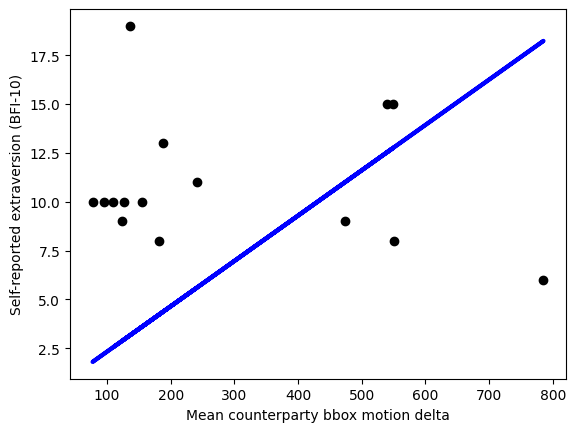

In [83]:


from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

est = sm.OLS(extraversion, mags)
est2 = est.fit()
print(est2.summary())

predicted = est2.predict(mags)

# Plot outputs
plt.scatter(mags, extraversion, color="black")
plt.plot(mags, predicted, color="blue", linewidth=3)

plt.xlabel('Mean counterparty bbox motion delta')
plt.ylabel('Self-reported extraversion (BFI-10)')
plt.savefig('HHI_extra_vs_mags.png')


In [60]:
!pip install statsmodels

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 13.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.8/233.8 kB 6.5 MB/s eta 0:00:00


In [62]:
regr = LinearRegression()

# Train the model using the training sets
regr.fit(mags, extraversion)

# Make predictions using the testing set
predicted = regr.predict(mags)

# Plot outputs
plt.scatter(mags, extraversion, color="black")
plt.plot(mags, predicted, color="blue", linewidth=3)

ValueError: Expected 2D array, got 1D array instead:
array=[233.11795811 274.11897827 280.05237746  84.39437377 216.71933569
 214.10940277 212.73361523 326.97072549].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.